# Analisi di un catalogo di ammassi di galassie

In questo esercizio viene analizzato un catalogo di ammassi di galassie (`euclid_ammassi.csv`) con caratteristiche simili a quelli che saranno osservati dalla missione Euclid. Il catalogo fornisce la massa (in masse solari) di ogni ammasso per un totale di tre valori di redshift e il volume di universo associato a ciascuno di essi (in ${Mpc}^3/h^3$).

## Parte uno: visualizzazione e analisi dei dati

_Scaricare il catalogo degli ammassi di galassie e analizzarne i dati, prestando particolare attenzione alla distribuzione delle masse degli ammassi. Si suggerisce di utilizzare scale logaritmiche per verificare la distribuzione dei dati._ 

Per importare il catalogo ho scelto di utilizzare la libreria Pandas. Utilizzo il comando `pd.read_csv` per convertire in dataframe il file csv. 

In [1]:
import pandas as pd
euclid_ammassi = pd.read_csv('euclid_ammassi.csv', index_col = 0)

Comincio a studiare il dataframe a partire dal redshift. Grazie al comando `.groupby()` noto che, come suggerito dalla consegna, le masse sono suddivise in tre bin di redshift; allo stesso modo è possibile individuare tre bin di volumi osservativi.

Procedo ad analizzare i diversi bin grazie alla funzione `.describe()`.

In [2]:
euclid_ammassi.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


In [3]:
euclid_ammassi.groupby('vol')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
vol,,,,,,,,
1.479387e+10,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
4.783826e+10,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
9.112247e+10,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


Per approfondire l'analisi converto i tre bin individuati in tre serie per facilitarne la manipolazione. <br/>
Creo due serie contenenti i diversi bin di redshift e volumi osservativi, e una terza contente i dati relativi alle masse osservate. Indicizzo i tre diversi bin $z = 0.506$, $z = 1.019$, $z = 1.500$ con $0$, $1$ e $2$ rispettivamente. <br/>
In sintesi, posso accedere all'$i$-esimo bin di redshift, massa e volume rispettivamente come `z[i]`, `mass[i]` e `vol[i]`.

In [4]:
import numpy as np

z = [0.506, 1.019, 1.500]
vol = [1.479387e+10, 4.783826e+10, 9.112247e+10]

em0 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[0]].index)
em1 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[1]].index) 
em2 = euclid_ammassi.drop(euclid_ammassi[euclid_ammassi['z'] != z[2]].index) 

mass = [em0['mass'], em1['mass'], em2['mass']]

Con i dati alla mano posso procedere a visualizzare graficamente i dati degli istogrammi. <br/>
Importo `matplotlib.pyplot` per istogrammare le distribuzioni di ammassi dei tre bin in altrettanti `subplots`; siccome la distribuzione degli ammassi è, in prima approssimazione, esponenziale, ho scelto di utilizzare una scala log-log come suggerito dal testo.

**Nota:** in questo esercizio, per ogni bin, gli ammassi sono completamente caratterizzati dalla loro massa, misurata in masse solari. Sarà dunque questa grandezza a comparire negli istogrammi e nel corso della relazione, per brevità, ricorrerò al termine "masse" per riferirmi agli ammassi.

**Nota:** l'utilizzo di una scala logaritmica ha delle conseguenze sulla creazione degli intervalli di base dell'istogramma. Per essere equispaziati su scala logaritmica, infatti, la progressione degli estremi degli intervalli non deve essere lineare, ma geometrica: ho dunque usato la funzione `np.geomspace()` invece di `np.linspace()`.

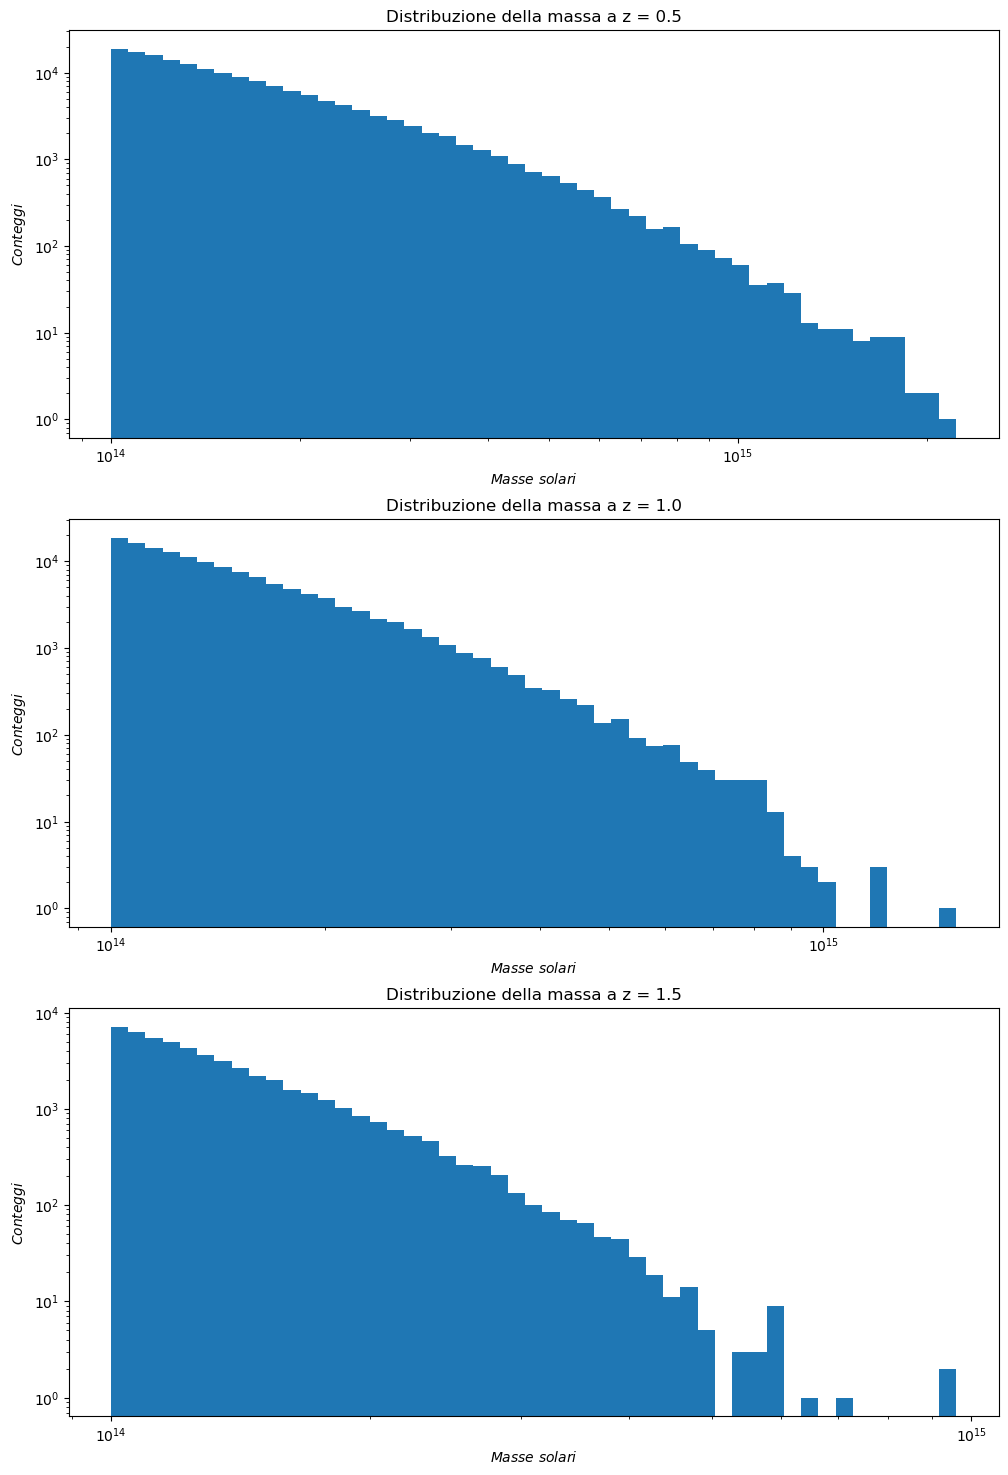

In [5]:
import matplotlib.pyplot as plt

fig, (ax0, ax1, ax2) = plt.subplots(3, figsize = (12, 18))
axes = [ax0, ax1, ax2]

for i in range(len(z)):
    
    counts, bin_edges = np.histogram(mass[i], bins = np.geomspace(mass[i].min(), mass[i].max(), num = 50))
    axes[i].set(xlabel = '$Masse\ solari$', xscale = 'log',
                ylabel = '$Conteggi$', yscale = 'log',
                title = 'Distribuzione della massa a z = %.1f' % (z[i]))
    axes[i].stairs(counts, bin_edges, fill = True)

plt.show()

Dopo aver graficato individualmente i tre bin, ho ritenuto interessante cofrontarli tutti e tre in un unico istogramma. Noto così un range leggermente diverso (rispetto a una scala logaritmica) di massa e di conteggi per i tre diversi bin.

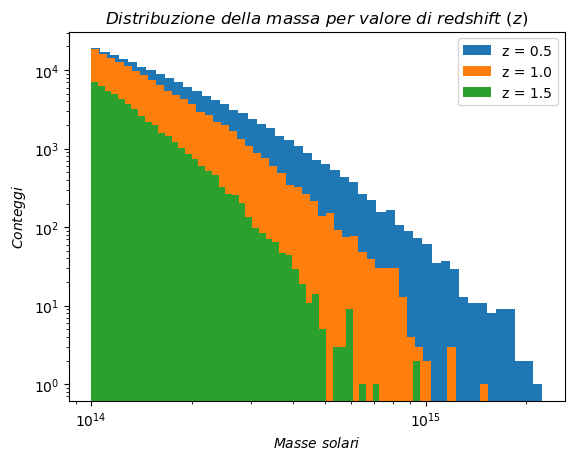

In [6]:
plt.loglog()
plt.xlabel('$Masse\ solari$')
plt.ylabel('$Conteggi$')
plt.title('$Distribuzione\ della\ massa\ per\ valore\ di\ redshift\ (z)$')

for i in range(len(z)):
    counts, bin_edges = np.histogram(mass[i], bins = np.geomspace(mass[i].min(), mass[i].max(), num = 50))
    plt.stairs(counts, bin_edges, fill = True, label = 'z = %.1f' % (z[i]))
    
plt.legend()
plt.show()

**Conclusione:** in ogni bin di redshift i conteggi delle masse decadono esponenzialmente all'aumentare della massa stessa. Ammassi di $10^{14}$ masse solari sono fino a $10^{4}$ volte più comuni di ammassi di $10^{15}$ masse solari.

## Parte due: analisi della Halo Mass Function (HMF)

_Analizzare ogni bin di redshift individualmente e confrontare la distribuzione osservata delle masse degli ammassi (Halo Mass Function, HMF) con la distribuzione teorica predetta da diversi parametri cosmologici per verificarne la dipendenza._

_Per questo scopo, si consiglia di utilizzare la libreria Colossus._

Vorrei confrontare gli istogrammi creati in precedenza con le predizioni della mass functions contenuta nella libreria Colossus, come suggerito. Comincio dall'importare Colossus e dall'impostare la cosmologia. Con riferimento al testo del problema, i vari parametri cosmologici inizializzati sono:

- `flat`: geometria dell'universo. Ho utilizzato una geometria piatta;
- `H0`: costante di Hubble. Ho utilizzato il valore vincolato dalla survey Planck;
- `Om0`: densità di materia totale. Ho utilizzato il valore suggerito di 0.31;
- `Ob0`: densità barionica. Ho utilizzato il valore vincolato dalla survey Planck; 
- `sigma8`: ampiezza delle fluttuazione primordiali di densità, su una scala di 8 $Mpc/h$. Ho utilizzato il valore suggerito di 0.81;
- `ns`: indice spettrale delle fluttuazioni primordiali di densità. Ho utilizzato il valore vincolato dalla survey Planck.

In [7]:
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 67.7, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

Una volta che ho impostato la cosmologia, ho proseguito con il calcolo del modello teorico della HMF usando la funzione `massFunction()`. Questa funzione fa uso della cosmologia appena impostata per predire puntualmente il valore della HMF in base alla massa data `m_arr`.

Nel grafico che segue è stato tracciato il modello di HMF per i diversi bin di redshift.

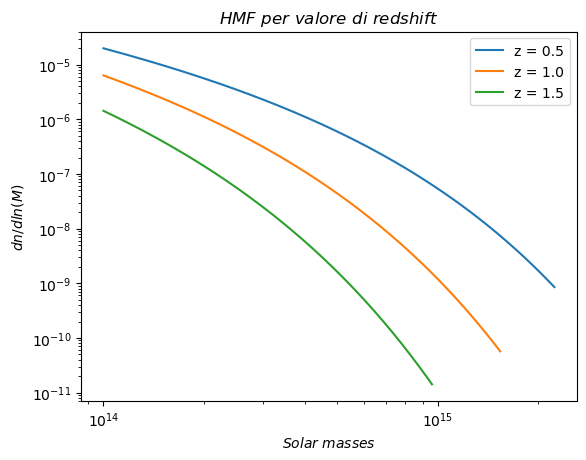

In [8]:
from colossus.lss import mass_function

plt.loglog()
plt.xlabel('$Solar\ masses$')
plt.ylabel('$dn/dln(M)$')
plt.title('$HMF\ per\ valore\ di\ redshift$')

for i in range(len(z)):
    m_arr = np.geomspace(mass[i].min(), mass[i].max(), num = 150)
    mfunc = mass_function.massFunction(m_arr, z[i], mdef = 'vir', model = 'despali16', q_out = 'dndlnM')
    plt.plot(m_arr, mfunc, label = 'z = %.1f' % (z[i]))
    
plt.legend()
plt.show()

Una volta calcolati i modelli teorici di cui ho bisogno, non resta altro da fare se non confrontarli con i dati osservati. Per fare ciò devo convertire i conteggi degli istogrammi in unità di $dn/dlnM$, dove $n$ indica la densità di aloni osservati, $lnM$ è il logaritmo naturale delle masse osservate e $d$ indica piccole variazioni di queste quantità. <br/>
Più nello specifico, $dn$ è la densità di materia contenuta in ciascun intervallo dell'istogramma e $dlnM$ è la differenza dei logoritmi degli estremi di ciascun intervallo degli istogrammi

Qui di seguito si può osservare l'esito grafico dell'operazione per ciascun bin di redshift. Per individuare meglio i vari passaggi logici, nel seguente frammento di codice sono stati aggiunti alcuni commenti.

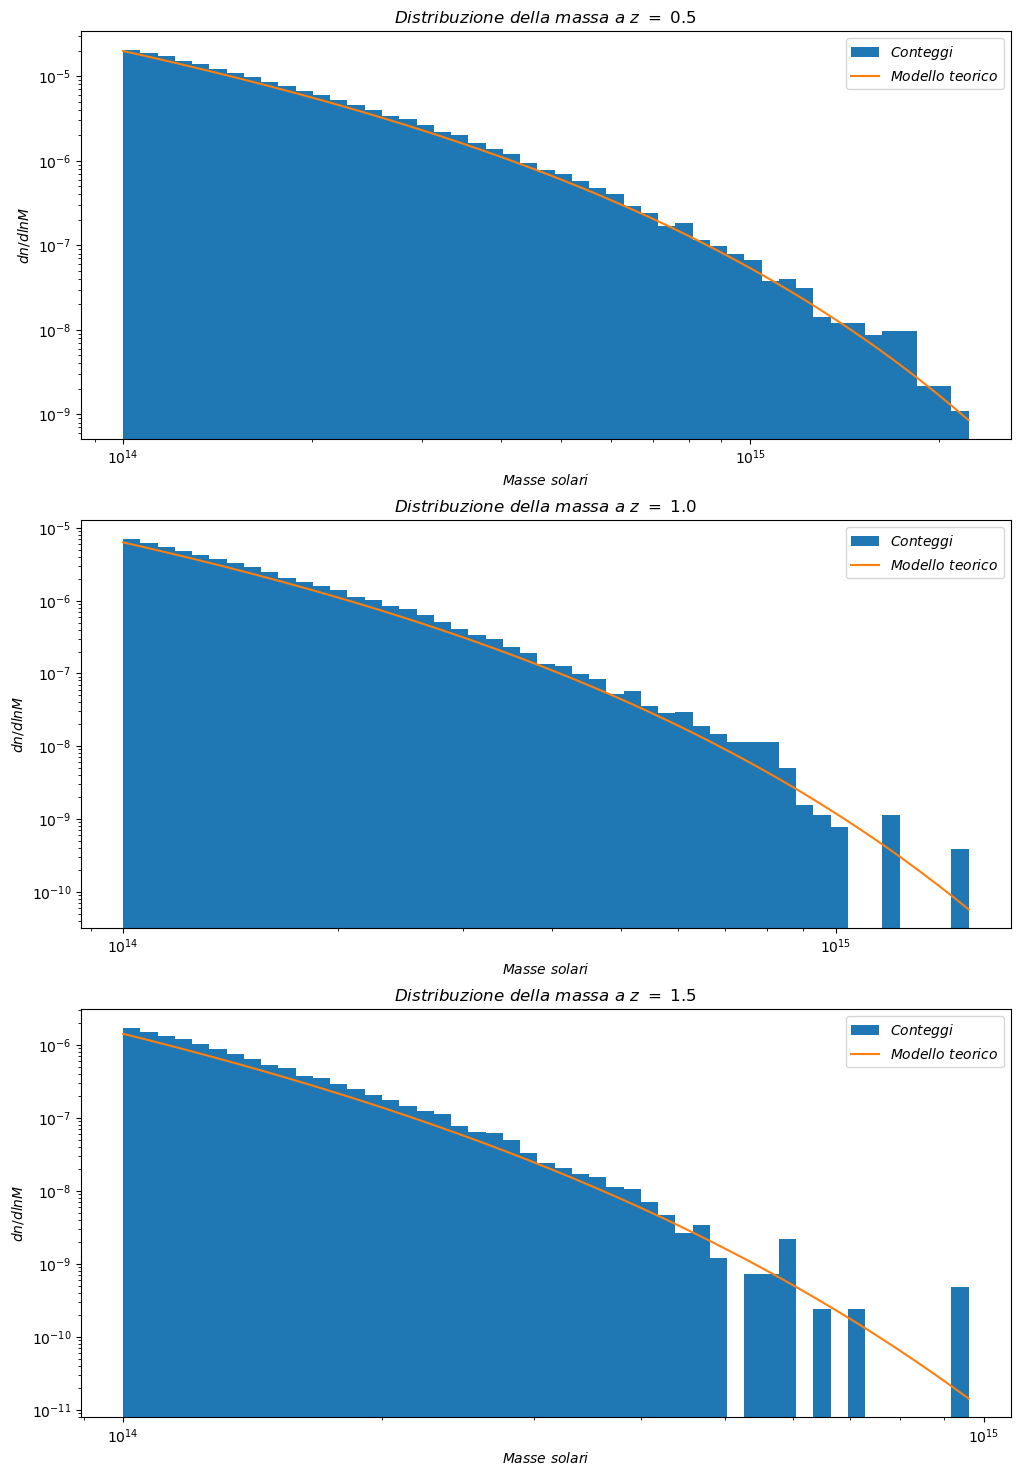

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(3, figsize = (12, 18))
axes = [ax0, ax1, ax2]

for i in range(len(z)):
    
    # Creo un istogramma che contenga i conteggi delle masse.
    mass_counts, bin_edges = np.histogram(mass[i], bins = np.geomspace(mass[i].min(), mass[i].max(), num = 50))
    
    # Converto le unità di misura (ovvero i conteggi) dell'istogramma in dn/dlnM.
    dn = mass_counts/vol[i]
    dlnM = (np.log(bin_edges.max()) - np.log(bin_edges.min()))/50
    den_counts = dn/dlnM
    
    # Definisco il modello da sovrapporre all'istogramma.
    m_arr = np.geomspace(mass[i].max(), mass[i].min(), 150)
    mfunc = mass_function.massFunction(m_arr, z[i], mdef = 'vir', model = 'despali16', q_out = 'dndlnM')
    
    # Creo il grafico dell'istogramma e del modello sovrapposto.
    axes[i].set(xlabel = '$Masse\ solari$', xscale = 'log',
                ylabel = '$dn/dlnM$', yscale = 'log',
                title = '$Distribuzione\ della\ massa\ a\ z\ =\ %.1f$' % (z[i]))
    axes[i].stairs(den_counts, bin_edges, fill = True, label = '$Conteggi$')
    axes[i].plot(m_arr, mfunc, label = '$Modello\ teorico$')
    axes[i].legend()

plt.show()

**Conclusione:** gli istogrammi mostrano che, qualitativamente, i dati forniti dal testo del problema permettono di costruire un buon modello teorico per predire l'andamento della HMF. <br/>
La corrispondenza tra modelli cosmologici e dati reali è relativamente buona.

## Parte tre: inferenza bayesiana sui parametri cosmologici

### Modelli flat $\Lambda$CDM

_Dopo aver confrontato le predizioni teoriche della HMF con i dati osservati e aver verificato un accordo relativamente buono tra i modelli cosmologici di riferimento e i dati, procedere con una fase di inferenza bayesiana sui parametri cosmologici._

_Assumere che il numero degli oggetti osservati in un determinato intervallo dell'istogramma sia una realizzazione poissoniana del numero teorico atteso predetto dalla HMF._

_I parametri di maggiore interesse per questa analisi sono `om0` e `sigma8`, per i quali si possono inizialmente assumere prior uniformi su un intervallo $[0.1, 1.1]$. Fissare il resto dei parametri ai valori vincolati dalla survey Planck._ <br/>
_Analizzare inizialmente i tre bin di redshift individualmente. Ha senso combinarli per un'analisi congiunta?_

#### Creazione della posterior distribution

Comincio con il creare la parte di codice comune alle analisi dei tre bins, ovvero quella che contiene il logaritmo del posterior. <br/>

Importo la distribuzione di Poisson assunta dalla libreria `scipy.stats`. <br/>
In questo caso, a differenza dei precedenti istogrammi, ho convertito le unità di misura del modello teorico invece di quelle dei dati osservati: la distribuzione di Poisson richiede che i dati in input siano del tipo `int` (ovvero numeri interi).

Come in precedenza, sono stati usati alcuni commenti per chiarificare la creazione della funzione di likelihood logaritmica.

**Nota:** per ovviare a un fatal error riportato dalla libreria Colossus riguardo la positività di un parametro `Ode0` (che nella prossima sezione si scoprirà essere la densità di energia oscura), in tutta la trattazione il prior suggerito è stato ristretto a un intervallo $[0.2, 1.0]$.

In [10]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function
from scipy.stats import poisson

def log_prior(theta):
    Om0, sigma8 = theta
    if 0.2 <= sigma8 <= 1.0 and 0.2 <= Om0 <= 1.0:
        return 0.0
    return -np.inf

def log_likelihood(theta, M, z, V):
    
    # Creo l'istogramma da confrontare con il modello teorico.
    counts, bin_edges = np.histogram(M, bins = np.geomspace(M.min(), M.max(), num = 50))
    bin_centers = np.ones(len(counts))
    
    # Calcolo i valori di massa di cui vorrei calcolare il numero teorico atteso.
    for k in range(len(bin_edges) - 1):
        bin_centers[k] = (bin_edges[k + 1] + bin_edges[k])/2
        
    # Definisco il modello teorico che vorrei inferire e ne converto le unità di misura.    
    Om0, sigma8 = theta
    params = {'flat': True, 'H0': 67.7, 'Om0': Om0, 'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    dlnM = (np.log(bin_edges.max()) - np.log(bin_edges.min()))/50
    modello = mass_function.massFunction(bin_centers, z, mdef = 'vir', model = 'despali16', q_out = 'dndlnM') * dlnM * V
    
    # Sommo tutto insieme per calcolare il logaritmo del likelihood.
    return np.nansum(poisson.logpmf(counts, modello))

def log_posterior(theta, M, z, V):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z, V)

#### Primo bin di redshift

**Nota:** i passaggi scritti esplicativi sono stati omessi dai prossimi due bin di redshift in quanto del tutto analaghi a quanto riportato nelle prossime celle. 

Per l'inferenza bayesiana decido di utilizzare la libreria `emcee` e di sfruttare un metodo di campionamento del tipo Markov chain Monte Carlo (MCMC).

Prima di inizializzare ed eseguire le catene, scelgo il punto iniziale da cui far partire i walker grazie alla funzione `minimize` di `scipy`. <br/>
A sua volta, `minimize` ha bisogno di una ipotesi di minimo in input: come ipotesi ho optato di utilizzare dei valori estratti da una distribuzione uniforme centrata sui valori suggeriti nel punto precedente.

Sono stati stampati punti iniziali ricavati in questo modo e il corrispondente valore logaritmico del posterior.

In [11]:
from scipy.optimize import minimize
from numpy import random

nlp = lambda *args: -log_posterior(*args)
Om0 = 0.31
sigma8 = 0.81
guess = [Om0, sigma8] + np.random.uniform(0.01, -0.01,  2)
bf_params = minimize(nlp, guess, args = (mass[0], z[0], vol[0]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.32799415 0.81422309]
Valore logaritmico del posterior: -232.3523168807635


Una volta ricavati i punti iniziali, ho definito altre due distribuzioni uniformi centrate su tali punti per estrarre la `initial_p` richiesta da `minimize`. <br/>
Posso quindi procedere ad inizializzare ed eseguire le catene; come suggerito dal testo del problema, utilizzo $20$ walkers per $1000$ passi.

In [13]:
import emcee

nparams = 2
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[0], z[0], vol[0]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [41:13<00:00,  2.47s/it]


State([[0.32214156 0.81927068]
 [0.32053197 0.82093673]
 [0.31957276 0.82275702]
 [0.32156171 0.8208968 ]
 [0.32276659 0.81832365]
 [0.31967569 0.82202386]
 [0.32126573 0.82086809]
 [0.3210502  0.82095651]
 [0.31834752 0.8234128 ]
 [0.3199512  0.82233645]
 [0.32146723 0.82131691]
 [0.32393459 0.81800603]
 [0.31995179 0.82257986]
 [0.3226625  0.81950753]
 [0.32316759 0.81935901]
 [0.32061958 0.82165618]
 [0.31769148 0.82452484]
 [0.32124283 0.8204782 ]
 [0.31900486 0.82230773]
 [0.32083768 0.82097354]], log_prob=[-224.66834461 -223.96522108 -223.87999654 -223.85147434 -226.53015003
 -223.64394415 -223.34828731 -223.2836521  -224.36018924 -223.64821547
 -224.82680697 -225.1296574  -224.19751014 -223.92121347 -224.73886813
 -223.47923336 -225.20319541 -223.53291271 -224.78841129 -223.36081337], blobs=None, random_state=('MT19937', array([3091824896, 1339427313, 2894357047, 1375634221, 1864176424,
       2436354125, 2833022251,   79347442, 3512449117,  889653991,
       4095188076, 1594756

Vorrei visualizzare l'andamento delle due catene per verificarne la bontà e scegliere un numero di passi del campionamento da escludere per tenere conto del periodo di burn-in. 

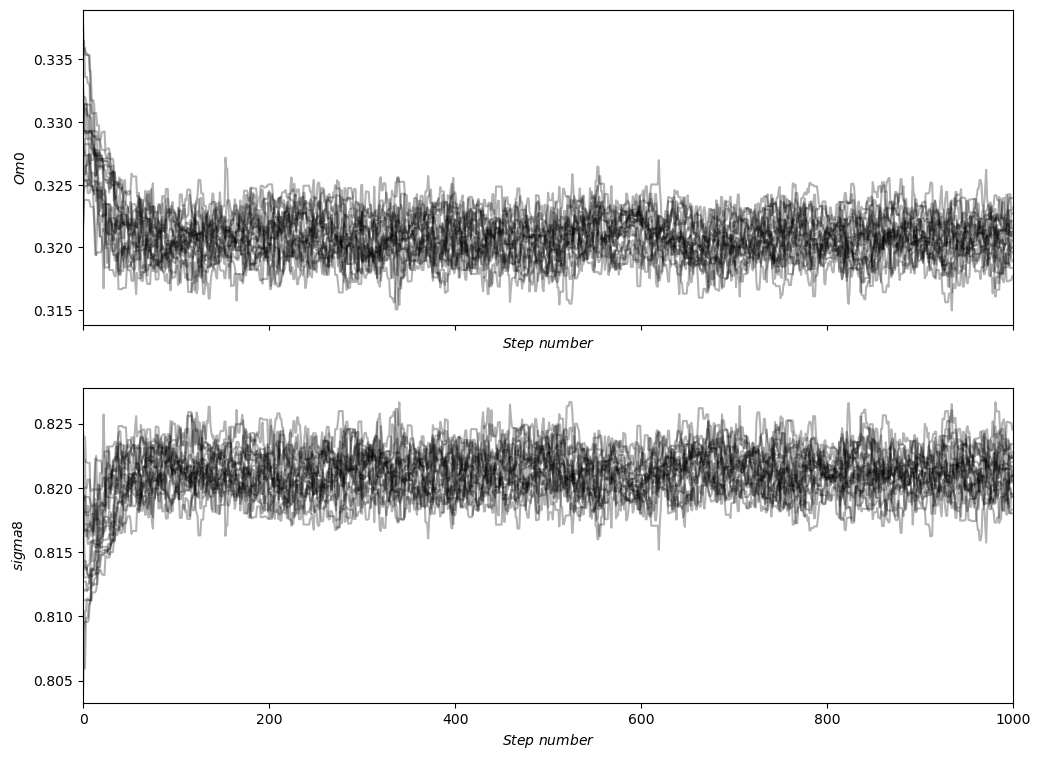

In [14]:
fig, axes = plt.subplots(2, figsize = (12, 9), sharex = True)
samples = sampler.get_chain()
labels = ['$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

Grazie ai grafici delle catene scelgo un numero di passi pari a $100$ da rimuovere da ogni catena. Grazie al comando `flat` preparo i samples ad essere graficati in modo da visualizzare la loro distribuzione.

In [15]:
flat_samples = sampler.get_chain(discard = 100, flat = True)

Appiattite le catene, posso finalmente utilizzare la libreria `pygtc` per graficare le posterior distribution.

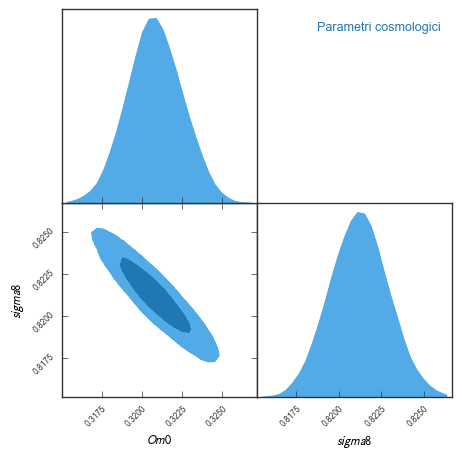

In [16]:
import pygtc
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

Grazie alle posterior, posso stimare i valori di best fit usando il sedicesimo, cinquantesimo, ottantaquattresimo percentile.

Dopo aver salvato i percentili per futura consultazione, concludo dunque che le stime ottenute grazie ad `emcee` sono le seguenti:

In [27]:
np.save('samples_0f', flat_samples)

In [28]:
from IPython.display import display, Math

flat_samples = np.load('samples_0f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Secondo bin di redshift

In [29]:
nlp = lambda *args: -log_posterior(*args)
Om0 = 0.31
sigma8 = 0.81
guess = [Om0, sigma8] + np.random.uniform(0.01, -0.01,  2)
bf_params = minimize(nlp, guess, args = (mass[1], z[1], vol[1]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.3317462  0.81869219]
Valore logaritmico del posterior: -244.958928344281


In [30]:
nparams = 2
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[1], z[1], vol[1]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [40:34<00:00,  2.43s/it]


State([[0.32166214 0.82517605]
 [0.31762757 0.8274166 ]
 [0.31869399 0.82625964]
 [0.31450124 0.82875321]
 [0.32001277 0.82519795]
 [0.31846829 0.82620016]
 [0.31617208 0.82749397]
 [0.31809868 0.82683612]
 [0.31428333 0.82951272]
 [0.31601852 0.82818672]
 [0.3182352  0.82648676]
 [0.31389244 0.830285  ]
 [0.31846931 0.82632368]
 [0.31621712 0.82744541]
 [0.31221574 0.83065614]
 [0.31677953 0.82747188]
 [0.32130413 0.82478474]
 [0.31661125 0.8276664 ]
 [0.31890353 0.82599349]
 [0.31937518 0.82623657]], log_prob=[-226.57301682 -224.18147358 -224.68794659 -225.96259998 -226.44650168
 -225.53746262 -226.38593531 -224.09333111 -225.55249968 -224.31556396
 -224.80551905 -228.61630505 -224.92539431 -226.51472388 -227.3802417
 -224.52026343 -225.69265811 -224.32576206 -225.32633122 -224.34767952], blobs=None, random_state=('MT19937', array([3091824896, 1339427313, 2894357047, 1375634221, 1864176424,
       2436354125, 2833022251,   79347442, 3512449117,  889653991,
       4095188076, 15947568

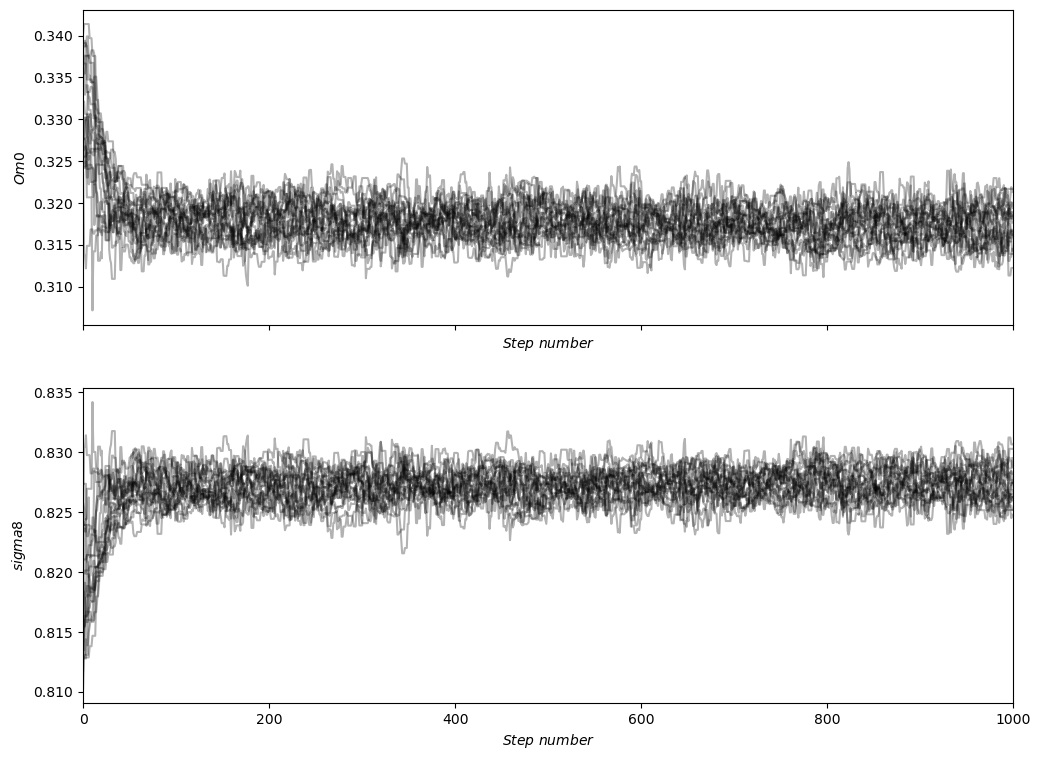

In [31]:
fig, axes = plt.subplots(2, figsize = (12, 9), sharex = True)
samples = sampler.get_chain()
labels = ['$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

In [32]:
flat_samples = sampler.get_chain(discard = 100, flat = True)

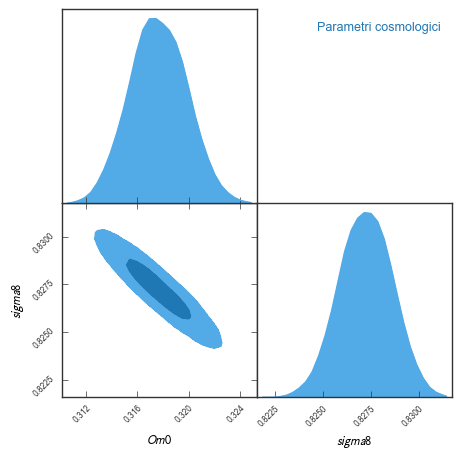

In [33]:
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

In [34]:
np.save('samples_1f', flat_samples)

In [35]:
flat_samples = np.load('samples_1f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Terzo bin di redshift

In [36]:
nlp = lambda *args: -log_posterior(*args)
Om0 = 0.31
sigma8 = 0.81
guess = [Om0, sigma8] + np.random.uniform(0.01, -0.01,  2)
bf_params = minimize(nlp, guess, args = (mass[2], z[2], vol[2]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.35921453 0.81112463]
Valore logaritmico del posterior: -216.47962994238657


In [37]:
nparams = 2
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[2], z[2], vol[2]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [45:56<00:00,  2.76s/it]


State([[0.33063355 0.82370308]
 [0.33475899 0.82180066]
 [0.3361916  0.8202371 ]
 [0.32828369 0.82366764]
 [0.32924721 0.82377586]
 [0.33107421 0.82254541]
 [0.33648604 0.82043091]
 [0.33310191 0.82182069]
 [0.33754181 0.81993263]
 [0.33441351 0.82116882]
 [0.33193502 0.82222614]
 [0.33385051 0.82185825]
 [0.33127301 0.82229161]
 [0.32858972 0.82341117]
 [0.33664727 0.82067067]
 [0.33287657 0.821798  ]
 [0.33148888 0.82220533]
 [0.33255172 0.82210416]
 [0.32483645 0.82596593]
 [0.33263351 0.82266461]], log_prob=[-202.08174084 -200.95689776 -201.14302067 -201.89034604 -200.88619287
 -200.89551428 -200.27121518 -200.28855186 -200.51441591 -200.44047646
 -200.61873462 -200.12584155 -201.47962331 -202.28613535 -200.23655068
 -200.58389235 -201.41771297 -200.26009867 -203.50917672 -200.91007523], blobs=None, random_state=('MT19937', array([3091824896, 1339427313, 2894357047, 1375634221, 1864176424,
       2436354125, 2833022251,   79347442, 3512449117,  889653991,
       4095188076, 1594756

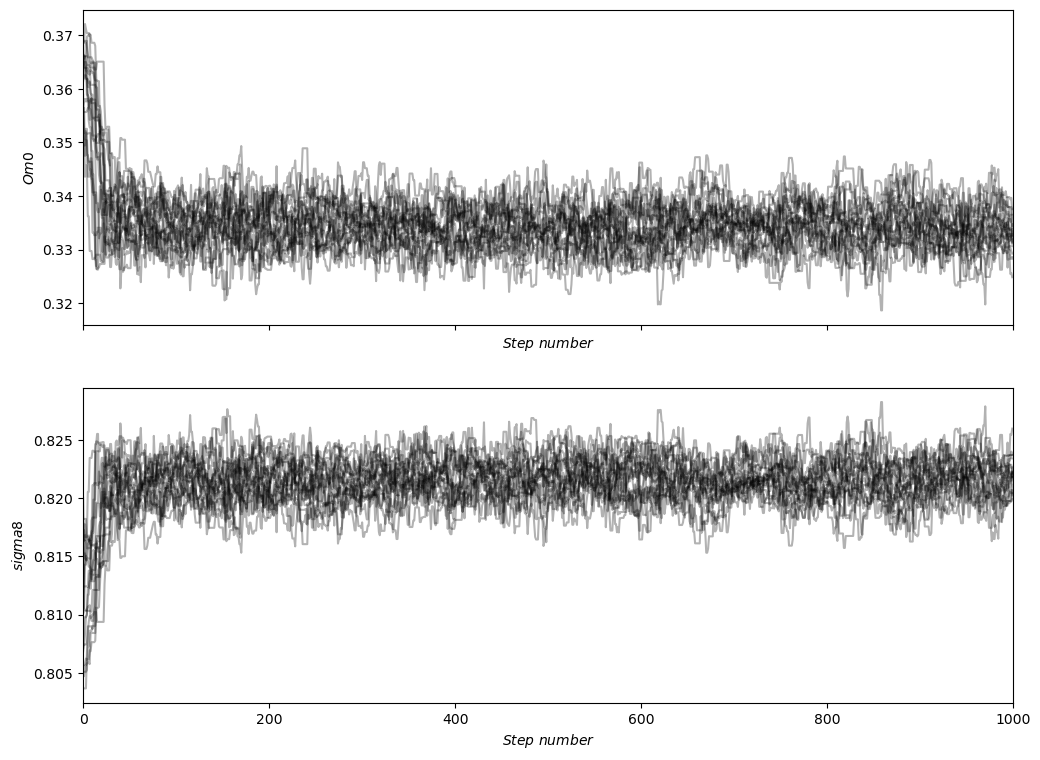

In [38]:
fig, axes = plt.subplots(2, figsize = (12, 9), sharex = True)
samples = sampler.get_chain()
labels = ['$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

In [39]:
flat_samples = sampler.get_chain(discard = 100, flat = True)

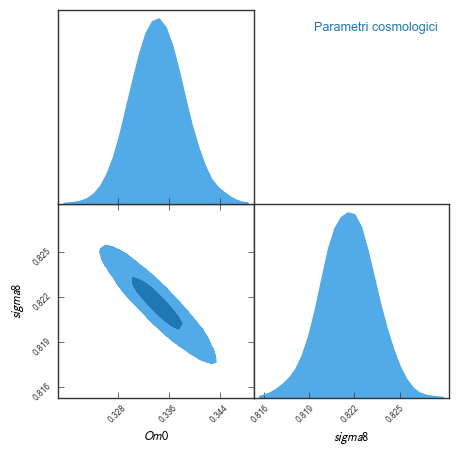

In [40]:
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

In [41]:
np.save('samples_2f', flat_samples)

In [42]:
flat_samples = np.load('samples_2f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Sintesi delle stime ottenute

Per $z = 0.506$, i vincoli su `Om0` e `sigma8` sono i seguenti:

In [120]:
flat_samples = np.load('samples_0f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Per $z = 1.019$, i vincoli su `Om0` e `sigma8` sono i seguenti:

In [121]:
flat_samples = np.load('samples_1f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Per $z = 1.500$, i vincoli su `Om0` e `sigma8` sono i seguenti:

In [122]:
flat_samples = np.load('samples_2f.npy')
labels = ['Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Sensatezza della combinazione dei tre bin

Confrontando le stime dei parametri cosmologici per i tre bin di redshift, noto che sono diverse e non compatibili tra loro. Posso quindi supporre che a diverse distanze corrispondano diverse HMF e che a causa di ciò non sia possibile confrontare diversi bin in un'unica analisi.

**Nota:** non avendo mai seguito un corso di astrofisica o cosmologia, non so se una realtà in cui la HMF vari con la distanza abbia fisicamente senso. Intuitivamente (traendo ispirazione dal primo postulato della relatività ristretta) sono portato a credere che una realtà del genere non abbia senso, ma non avendone la certezza ho riportato lo stesso la precedente conclusione.

### Curvatura dell'universo

_Espandere l'analisi a modelli cosmologici in cui la geometria dell'universo non è necessariamente piatta. In questi modelli, oltre ai parametri `Om0` e `sigma8`, vogliamo considerare anche la densità di energia oscura `Ode0`._

_Nell'analizzare questi modelli ipotizzare di voler utilizzare i risultati di esperimenti precedenti, che hanno ottenuto vincoli su `Ode0` ben approssimati da una distribuzione gaussiana con $\mu = 0.7$ e $\sigma = 0.05$._

_Che vincoli otteniamo sulla densita’ di energia associata alla curvatura dell’Universo?_

$$ \Omega_k = 1 - \Omega_m - \Omega_{\Lambda} $$

**Nota:** nei codici:
- $\Omega_k$ = `OmK`;
- $\Omega_m$ = `Om0`;
- $\Omega_{\Lambda}$ = `Ode0`.

#### Creazione della posterior distribution

Come nel caso precedente, comincio ad analizzare l'ipotesi di un universo curvo definendo il logaritmo della posterior distribution. <br/>
A differenza di prima, però, dovrò cambiare la definizione di `log_prior` per tenere conto dei vincoli su `OmK` e in generale tenere conto della presenza di `OmK` nel definire le funzioni di cui avrò bisogno.

In [43]:
from scipy.stats import norm

def log_prior(theta):
    Ode0, Om0, sigma8 = theta
    if 0.1 <= sigma8 <= 1.1 and 0.1 <= Om0 <= 1.1 and Ode0 > 0:
        return norm.logpdf(Ode0, 0.07, 0.05)
    return -np.inf

def log_likelihood(theta, M, z, V):
    
    # Creo l'istogramma da confrontare con il modello teorico.
    counts, bin_edges = np.histogram(M, bins = np.geomspace(M.min(), M.max(), num = 50))
    bin_centers = np.ones(len(counts))
    
    # Calcolo i valori di massa di cui vorrei calcolare il numero teorico atteso.
    for k in range(len(bin_edges) - 1):
        bin_centers[k] = (bin_edges[k + 1] + bin_edges[k])/2
        
    # Definisco il modello teorico che vorrei inferire e ne converto le unità di misura.    
    Ode0, Om0, sigma8 = theta
    params = {'flat': False, 'H0': 67.7, 'Ode0': Ode0, 'Om0': Om0, 'Ob0': 0.049, 'sigma8': sigma8, 'ns': 0.95}
    cosmology.addCosmology('myCosmo', params)
    cosmo = cosmology.setCosmology('myCosmo')
    dlnM = (np.log(bin_edges.max()) - np.log(bin_edges.min()))/50
    modello = mass_function.massFunction(bin_centers, z, mdef = 'vir', model = 'despali16', q_out = 'dndlnM') * dlnM * V
    
    # Sommo tutto insieme per calcolare il logaritmo del likelihood.
    return np.nansum(poisson.logpmf(counts, modello))

def log_post(theta, M, z, V):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, M, z, V)

#### Primo bin di redshift

**Nota:** come in precedenza, i passaggi scritti esplicativi sono stati omessi dai prossimi due bin di redshift in quanto del tutto analaghi a quanto riportato nelle prossime celle. 

La definizione e l'esecuzione delle catene segue la stessa struttura utilizzata per studiare il caso flat $\Lambda$CDM. Comincio dal minimizzare il logaritmo della posterior per trovare la posizione iniziale richiesta dal sampler. 

In [44]:
nlp = lambda *args: -log_posterior(*args)
Ode0 = 0.7
Om0 = 0.31
sigma8 = 0.81
guess = [Ode0, Om0, sigma8] + np.random.uniform(0.01, -0.01,  3)
bf_params = minimize(nlp, guess, args = (mass[0], z[0], vol[0]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.69243415 0.35622116 0.80008632]
Valore logaritmico del posterior: -596.4841256084454


Imposto le catene inserendo la posizione iniziale appena trovata e tenendo conto che `nparams` adesso sarà pari a $3$. Mantengo il numero di walker a $20$ e il numero di passi a $1000$.

In [45]:
nparams = 3
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[0], z[0], vol[0]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [39:45<00:00,  2.39s/it]


State([[0.0725187  0.3158869  0.79853956]
 [0.0525128  0.32080438 0.79275021]
 [0.08870451 0.32400979 0.79112463]
 [0.03210868 0.31771328 0.79495362]
 [0.09926437 0.3195149  0.79671133]
 [0.09370012 0.31926951 0.79634992]
 [0.09338955 0.31918473 0.79557109]
 [0.0740541  0.32190304 0.79269099]
 [0.09892674 0.32286692 0.79204261]
 [0.10372784 0.31884036 0.79696494]
 [0.12115612 0.32147922 0.79527473]
 [0.00586323 0.32089785 0.79137126]
 [0.09454899 0.3199612  0.795654  ]
 [0.03988762 0.31849683 0.79517131]
 [0.09933596 0.3197695  0.79555816]
 [0.0831854  0.32014902 0.79486744]
 [0.09060557 0.32242336 0.79331685]
 [0.03684685 0.32064719 0.79219664]
 [0.02058099 0.32226956 0.79069852]
 [0.14796511 0.32081572 0.79674035]], log_prob=[-226.1568761  -221.25377043 -223.18262257 -223.21584364 -224.10187996
 -222.64658095 -221.91171445 -221.44513117 -223.41434395 -222.54133592
 -222.27132504 -222.66348029 -222.07799201 -224.07481752 -221.54071026
 -221.57952425 -222.52508496 -221.43798208 -222.73

Visualizzo la bontà del sampling graficando le catene.

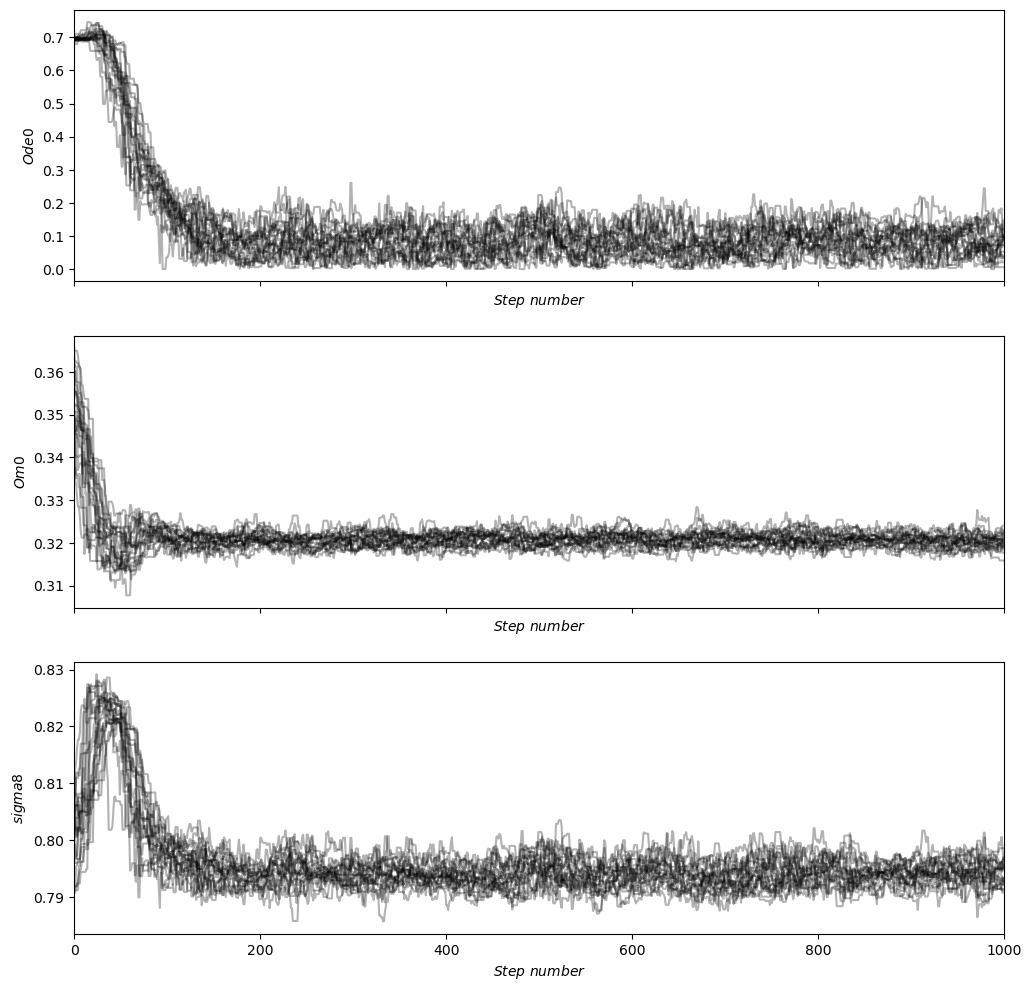

In [46]:
fig, axes = plt.subplots(3, figsize = (12, 12), sharex = True)
samples = sampler.get_chain()
labels = ['$Ode0$','$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

Noto che per uno scenario non piatto il periodo di burn-in è più prolungato: ne tengo conto scartando più passi di prima, ovvero $200$.

In [65]:
flat_samples = sampler.get_chain(discard = 200, flat = True)

Grazie ai dati campionati posso finalmente vedere che aspetto abbiano le posterior distribution.

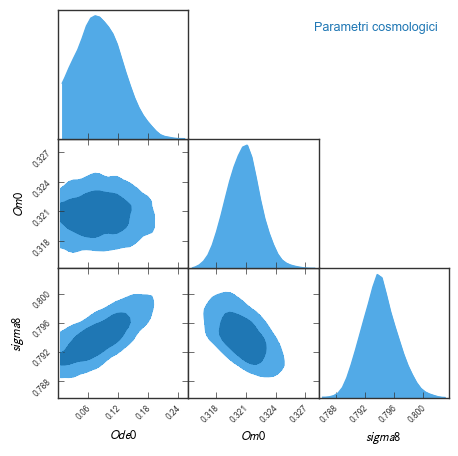

In [67]:
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Ode0$', '$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

Non mi rimane che salvare i dati campionati per futuri utilizzi. <br/>
Stimo i valori di best fit come ho fatto in precedenza, ovvero calcolando il sedicesimo, cinquantesimo e ottantaquattresimo percentile. Ottengo così le stime riportate qui di seguito.

In [69]:
np.save('samples_0c', flat_samples)

In [70]:
flat_samples = np.load('samples_0c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Vorrei dunque studiare i vincoli che il modello impiegato impone su `OmK`, la densità di energia associata alla curvatura dell'universo. Ricavo `OmK` a partire dall'equazione

$$ \Omega_k = 1 - \Omega_m - \Omega_{\Lambda} $$

e ne stimo il valore usando, come sempre, il sedicesimo, cinquantesimo e ottantaquattresimo percentile.

In [76]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

Concludo l'analisi di `OmK` graficando un istogramma del campione.

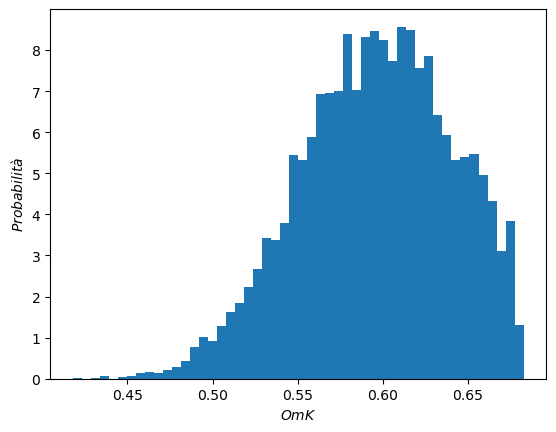

In [75]:
plt.xlabel('$OmK$')
plt.ylabel('$Probabilità$')
plt.hist(OmK, bins = 50, density = True)
plt.show()

#### Secondo bin di redshift

In [105]:
nlp = lambda *args: -log_posterior(*args)
Ode0 = 0.7
Om0 = 0.31
sigma8 = 0.81
guess = [Ode0, Om0, sigma8] + np.random.uniform(0.01, -0.01,  3)
bf_params = minimize(nlp, guess, args = (mass[1], z[1], vol[1]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.7011152  0.37801469 0.81780868]
Valore logaritmico del posterior: -1448.3445129818201


In [106]:
nparams = 3
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[0], z[0], vol[0]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [39:50<00:00,  2.39s/it]


State([[0.00640865 0.32049219 0.79177848]
 [0.08386438 0.31911849 0.79530936]
 [0.01697587 0.31901342 0.79252965]
 [0.05862893 0.32426481 0.78932228]
 [0.06114584 0.32226242 0.79237156]
 [0.09618646 0.32144147 0.79375033]
 [0.02054487 0.32321063 0.78908193]
 [0.08765857 0.31970864 0.7950951 ]
 [0.07901562 0.32377965 0.79054077]
 [0.12183427 0.32037552 0.7953564 ]
 [0.06674657 0.3183542  0.79528613]
 [0.0445406  0.31940809 0.79355491]
 [0.06601206 0.32087115 0.79351836]
 [0.13534337 0.3223556  0.79514996]
 [0.06662531 0.32015797 0.79378079]
 [0.08054546 0.31839086 0.79610924]
 [0.16177194 0.32011581 0.79752391]
 [0.10912039 0.32054006 0.7953079 ]
 [0.14036638 0.32055319 0.79658801]
 [0.00367634 0.31915531 0.79276603]], log_prob=[-222.71364389 -221.81136558 -222.93012715 -224.25704743 -222.58099034
 -221.46578862 -222.95425948 -221.45205424 -223.72856745 -222.51335625
 -222.3791602  -221.70847512 -221.44759049 -223.16881275 -221.28804695
 -222.2248535  -223.10029121 -221.52679416 -222.22

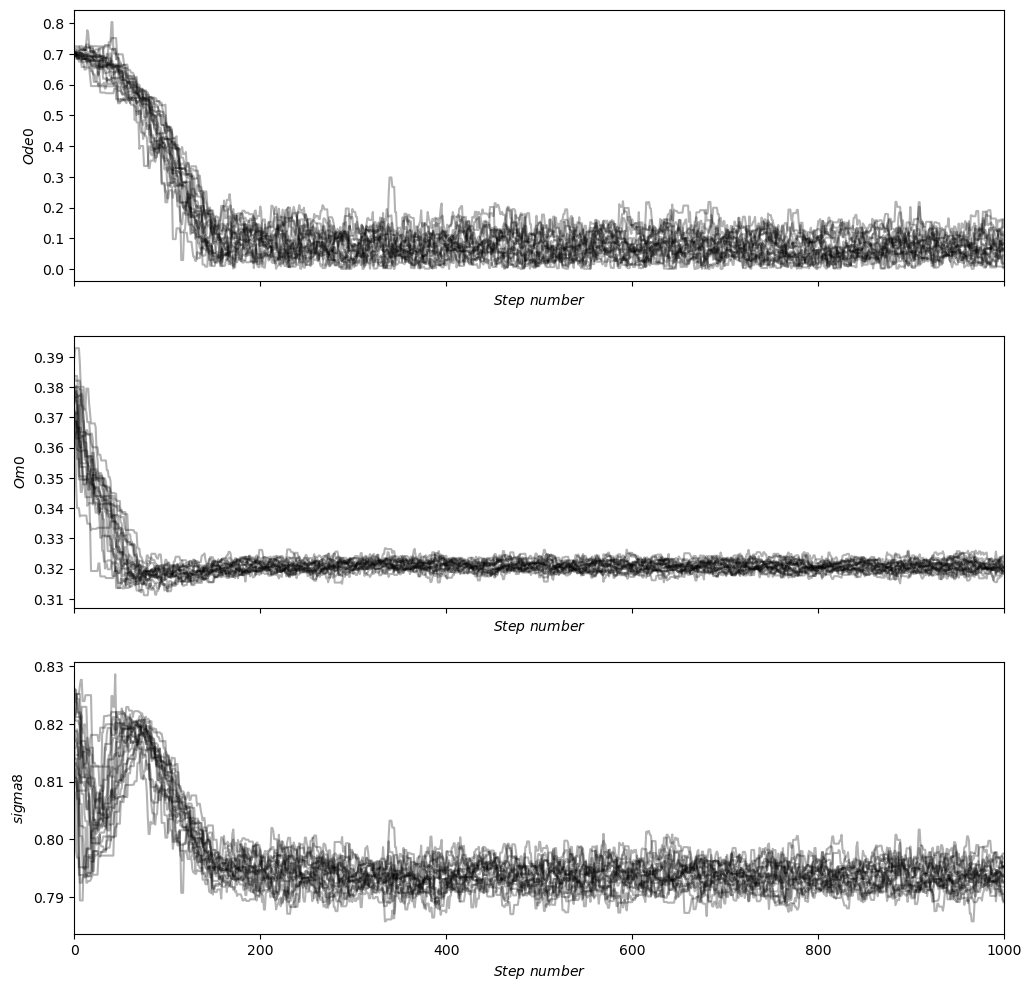

In [107]:
fig, axes = plt.subplots(3, figsize = (12, 12), sharex = True)
samples = sampler.get_chain()
labels = ['$Ode0$','$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

In [108]:
flat_samples = sampler.get_chain(discard = 200, flat = True)

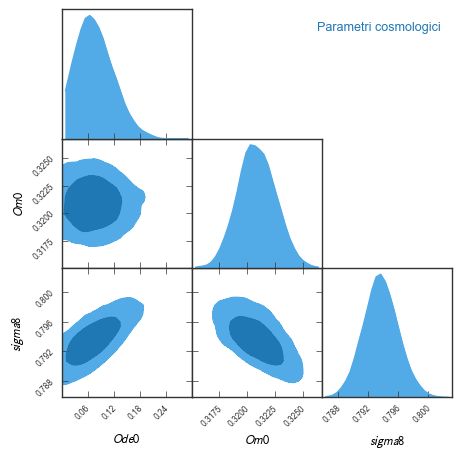

In [109]:
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Ode0$', '$Om0$','$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

In [110]:
np.save('samples_1c', flat_samples)

In [125]:
flat_samples = np.load('samples_1c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [126]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

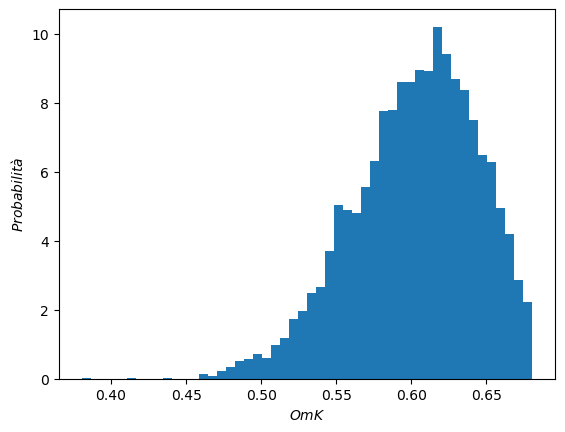

In [127]:
plt.xlabel('$OmK$')
plt.ylabel('$Probabilità$')
plt.hist(OmK, bins = 50, density = True)
plt.show()

#### Terzo bin di redshift

In [88]:
nlp = lambda *args: -log_posterior(*args)
Ode0 = 0.7
Om0 = 0.31
sigma8 = 0.81
guess = [Ode0, Om0, sigma8] + np.random.uniform(0.01, -0.01,  3)
bf_params = minimize(nlp, guess, args = (mass[1], z[1], vol[1]))

print('Punto di minimo: {}' .format(bf_params.x))
print('Valore logaritmico del posterior: {}' .format(-bf_params.fun))

C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\robiu\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Punto di minimo: [0.69781588 0.37129513 0.81727384]
Valore logaritmico del posterior: -1049.9584729319615


In [89]:
nparams = 3
nwalkers = 20
initial_p = bf_params.x + np.random.uniform(0.01, -0.01, (nwalkers, nparams))
sampler = emcee.EnsembleSampler(nwalkers, nparams, log_posterior, args = (mass[0], z[0], vol[0]))
sampler.run_mcmc(initial_p, 1000, progress = True)

100%|██████████| 1000/1000 [39:43<00:00,  2.38s/it]


State([[0.07580344 0.31939467 0.79382943]
 [0.0777723  0.3189281  0.79505409]
 [0.04380385 0.32096247 0.79335239]
 [0.07210988 0.32339346 0.79112466]
 [0.06454593 0.31929095 0.7944439 ]
 [0.07810981 0.32073103 0.793061  ]
 [0.17316097 0.32014981 0.79801561]
 [0.0678668  0.32114406 0.79317652]
 [0.08532444 0.32333125 0.79216875]
 [0.11569128 0.31868541 0.79732528]
 [0.06871162 0.32029853 0.79375227]
 [0.02373534 0.31973614 0.7925454 ]
 [0.08727684 0.32079166 0.793979  ]
 [0.11846517 0.32411066 0.79239891]
 [0.10550939 0.32042105 0.79502136]
 [0.04492621 0.32207377 0.79121306]
 [0.12181279 0.31857203 0.79850955]
 [0.07072303 0.32236182 0.79194055]
 [0.00846013 0.32184454 0.7898821 ]
 [0.04318324 0.3192892  0.79299829]], log_prob=[-224.855156   -222.19681306 -224.53019687 -222.41385483 -221.63776644
 -222.76787983 -223.48320341 -221.26801047 -222.83339853 -222.43785809
 -221.25084342 -221.81852443 -221.30964936 -223.61388965 -221.53811186
 -221.64864319 -225.19770165 -221.67973165 -222.32

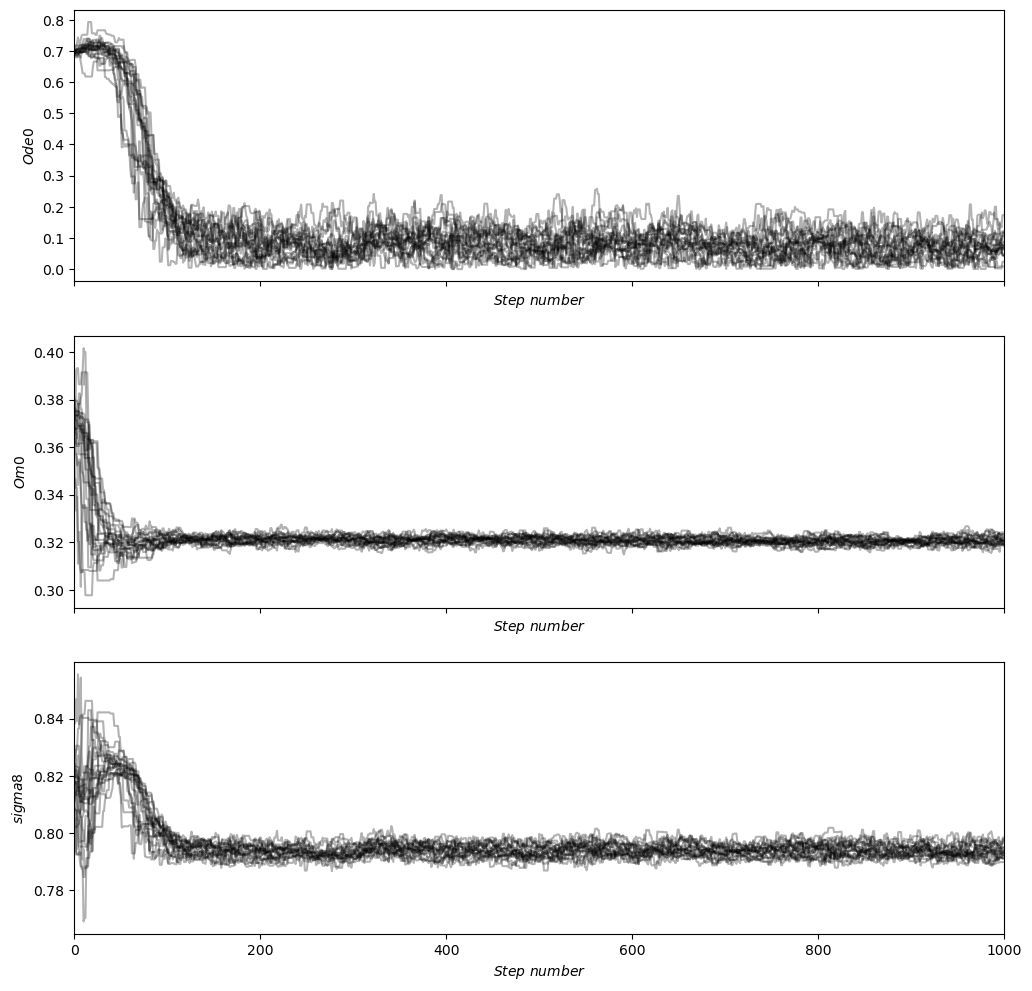

In [90]:
fig, axes = plt.subplots(3, figsize = (12, 12), sharex = True)
samples = sampler.get_chain()
labels = ['$Ode0$','$Om0$', '$sigma8$']
for i in range(nparams):
    ax = axes[i]
    ax.plot(samples[:, :, i], 'k', alpha = 0.3)
    ax.set(xlim = (0, len(samples)), ylabel = labels[i], xlabel = '$Step\ number$')

In [97]:
flat_samples = sampler.get_chain(discard = 200, flat = True)

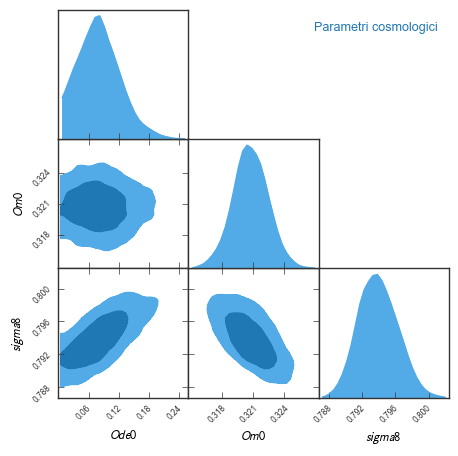

In [101]:
GTC = pygtc.plotGTC(chains = flat_samples,
                    paramNames = ['$Ode0$', '$Om0$', '$sigma8$'],
                    chainLabels = ['Parametri cosmologici'],
                    figureSize = 'MNRAS_page')

In [99]:
np.save('samples_2c', flat_samples)

In [100]:
flat_samples = np.load('samples_2c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [102]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

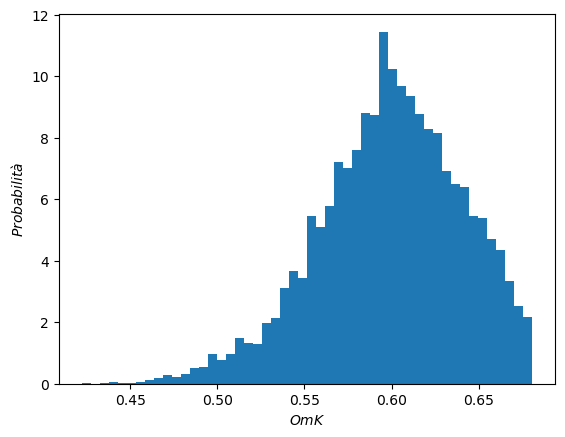

In [103]:
plt.xlabel('$OmK$')
plt.ylabel('$Probabilità$')
plt.hist(OmK, bins = 50, density = True)
plt.show()

#### Sintesi delle stime ottenute

Per $z = 0.506$, i vincoli su `Ode0`, `Om0`, `OmK` e `sigma8` sono i seguenti:

In [113]:
flat_samples = np.load('samples_0c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [114]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

Per $z = 1.019$, i vincoli su `Ode0`, `Om0`, `OmK` e `sigma8` sono i seguenti:

In [115]:
flat_samples = np.load('samples_1c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [116]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

Per $z = 1.500$, i vincoli su `Ode0`, `Om0`, `OmK` e `sigma8` sono i seguenti:

In [117]:
flat_samples = np.load('samples_2c.npy')
labels = ['Ode0', 'Om0', 'sigma8']
for i in range(nparams):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[0], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [118]:
OmK = 1 - flat_samples[:, 0] - flat_samples[:, 1]
mcmc = np.percentile(OmK, [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[0], q[0], q[1], 'OmK')
display(Math(txt))

<IPython.core.display.Math object>

### Conclusioni

Lo studio dei parametri cosmologici mediante l'inferenza bayesiana ha portato ad un affinamento dei parametri suggerito nel caso piatto; tuttavia, nel caso non piatto i risultati dell'inferenza hanno portato a dei valori di `OmK` svariate volte più bassi del previsto e (suppongo di conseguenza) a un valore di `sigma8` leggermente più alto rispetto allo scenario piatto.

Dal punto di vista prettamente statistico, l'algoritmo di campionamento implementato ha dato i risultati previsti; escludendo il periodo di burn-in, l'aspetto grafico delle catene è quello del rumore bianco e il tempo impiegato ad ottenere i campioni, per ciascuna catena, è stato di circa un'ora, come previsto nel testo del problema. <br/>
Purtroppo, gli istogrammi dei valori campionati di `OmK` appaiono "tagliati" e privi delle code destre. Tale fenomeno potrebbe essere ricondotto ad un simile bias, ma per quanto riguarda le code sinistre, su `Ode0`: tale valore infatti non può essere negativo, producendo un'improvvisa discontinuità della posterior in corrispondenza di `Ode0` $= 0$. Un'eventuale negatività, infatti, comporta un fatal error di `Colossus`, anche trascurando le specie relativistiche. 